In [2]:
# Import TensorFlow
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
print(tf.__version__) # find the version number (should be 2.x+)

2.8.2


In [3]:
# Go to Runtime > Change Runtime type > Accelerator Type > GPU
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 1. Create Fake Dataset

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize." 

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).


In [4]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [6]:
X.shape

(50,)

In [5]:
# Make labels for the dataset (adhering to the same pattern as before)
y = 3*X**2 - 30*X - 50
y

array([32950, 30478, 28102, 25822, 23638, 21550, 19558, 17662, 15862,
       14158, 12550, 11038,  9622,  8302,  7078,  5950,  4918,  3982,
        3142,  2398,  1750,  1198,   742,   382,   118,   -50,  -122,
         -98,    22,   238,   550,   958,  1462,  2062,  2758,  3550,
        4438,  5422,  6502,  7678,  8950, 10318, 11782, 13342, 14998,
       16750, 18598, 20542, 22582, 24718])

## 1.1 Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` arrays.

> 🔑 **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.

In [7]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

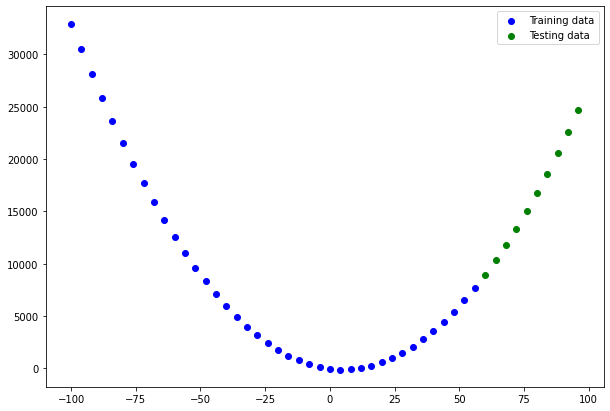

In [8]:

plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

# 2. Create and Train a Model

In [9]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1], name="first_layer") # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae", "mean_absolute_percentage_error"])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.weights

[<tf.Variable 'first_layer/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.5700599]], dtype=float32)>,
 <tf.Variable 'first_layer/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [12]:
model.layers

In [13]:
weight, bias = model.layers[0].get_weights()

In [14]:
weight

array([[0.5700599]], dtype=float32)

In [15]:
bias

array([0.], dtype=float32)

## 2.1 Flexibility of getting weights, share them to another layer

In [16]:
# Initialize layer with Constant weights
initializer_a = tf.keras.initializers.Constant(3.)
layer_a = tf.keras.layers.Dense(200, kernel_initializer=initializer_a)


# Initialize layer with a distribution of weights
initializer_b = tf.keras.initializers.GlorotNormal()
layer_b = tf.keras.layers.Dense(200, kernel_initializer=initializer_b)

# Build the layers with a fake input shape
input_shape = [100]
layer_a.build(input_shape)
layer_b.build(input_shape)

In [17]:
# Get weights
weights_a, bias_a = layer_a.get_weights()
weights_b, bias_b = layer_b.get_weights()

In [18]:
weights_a.shape

(100, 200)

In [ ]:
weights_b

array([[ 0.00781799, -0.07991183,  0.03509859, ...,  0.06067351,
         0.07385144, -0.11457174],
       [ 0.02241706, -0.07470839, -0.1018439 , ..., -0.16546494,
        -0.01303914, -0.01600327],
       [ 0.09550077,  0.02521211,  0.06799296, ...,  0.11505783,
        -0.05784814,  0.13141818],
       ...,
       [-0.08375132,  0.07324858,  0.05197708, ...,  0.04268229,
        -0.04261201, -0.07746224],
       [ 0.04288491, -0.07964747,  0.02116495, ...,  0.11532738,
         0.00185024,  0.13697663],
       [ 0.01054827, -0.09713469, -0.08357961, ...,  0.05299599,
         0.13891801, -0.03198342]], dtype=float32)

In [ ]:
bias_b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


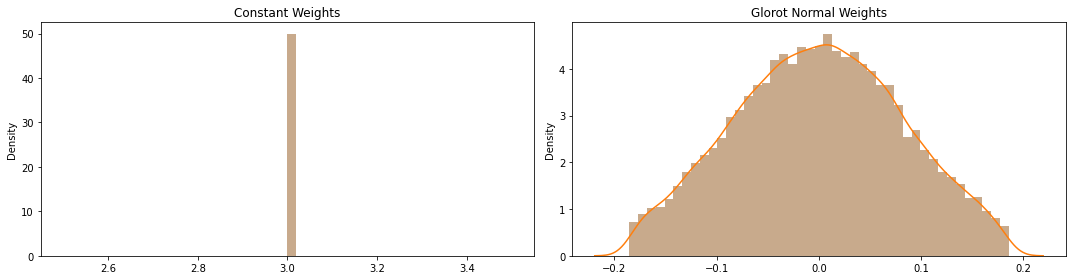

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))

# Constant Weights plot
sns.distplot(a=weights_a, kde=False, norm_hist=True, ax=ax1)
sns.distplot(a=weights_a, ax=ax1)
ax1.set_title('Constant Weights')

# Glorot Normal plot
sns.distplot(a=weights_b, kde=False, norm_hist=True, ax=ax2)
sns.distplot(a=weights_b, ax=ax2)
ax2.set_title('Glorot Normal Weights')

plt.tight_layout()
plt.show()

In [ ]:
# Set same Weights of Layber B to Layer A
layer_a.set_weights(layer_b.get_weights())
layer_a.get_weights()

[array([[ 0.00781799, -0.07991183,  0.03509859, ...,  0.06067351,
          0.07385144, -0.11457174],
        [ 0.02241706, -0.07470839, -0.1018439 , ..., -0.16546494,
         -0.01303914, -0.01600327],
        [ 0.09550077,  0.02521211,  0.06799296, ...,  0.11505783,
         -0.05784814,  0.13141818],
        ...,
        [-0.08375132,  0.07324858,  0.05197708, ...,  0.04268229,
         -0.04261201, -0.07746224],
        [ 0.04288491, -0.07964747,  0.02116495, ...,  0.11532738,
          0.00185024,  0.13697663],
        [ 0.01054827, -0.09713469, -0.08357961, ...,  0.05299599,
          0.13891801, -0.03198342]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

# 2.2 Train Model

In [19]:
# What is the right input shape of X
X_train.shape

(40,)

In [20]:
# Always keep in mind that Networks work expecting the dimensions of the tensor to be the [BATCH_SIZE x INPUT_SIZE]
tf.expand_dims(X_train, axis=-1).shape

TensorShape([40, 1])

In [21]:
# Inspect target shape
y_train.shape

(40,)

In [ ]:
# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100) # train for 100 epochs not 10

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 8483.3467 - mae: 8483.3467 - mean_absolute_percentage_error: 99.3263
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 8472.6699 - mae: 8472.6699 - mean_absolute_percentage_error: 99.8509
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 8460.5732 - mae: 8460.5732 - mean_absolute_percentage_error: 100.5108
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 8452.0059 - mae: 8452.0059 - mean_absolute_percentage_error: 100.9724
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 8445.1143 - mae: 8445.1143 - mean_absolute_percentage_error: 101.3170
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 8437.9434 - mae: 8437.9434 - mean_absolute_percentage_error: 101.6074
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8427.4980 - mae: 8427.4980 - mean_absolute_percentage_error: 102.0538
Epoch 8/100
2/

In [ ]:
# Make predictions
y_preds = model.predict(X_test)

In [ ]:
# View the predictions
y_preds

array([[-2704.5916],
       [-2885.0164],
       [-3065.4412],
       [-3245.866 ],
       [-3426.2908],
       [-3606.7156],
       [-3787.1404],
       [-3967.5652],
       [-4147.9897],
       [-4328.4146]], dtype=float32)

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

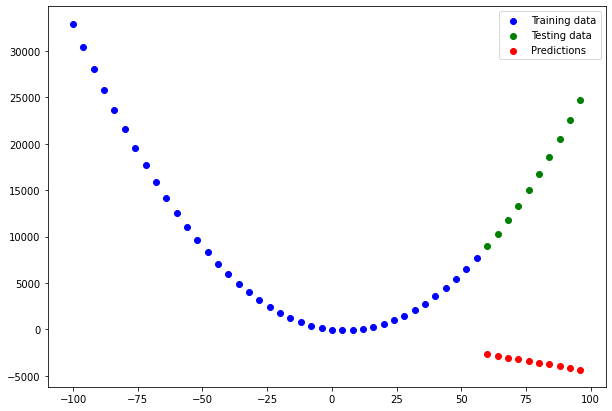

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

# 3. Evaluate Predictions

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics. 

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) which will return the loss of the model as well as any metrics setup during the compile step.

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 131ms/step - loss: 19774.5039 - mae: 19774.5039 - mean_absolute_percentage_error: 122.8461


[19774.50390625, 19774.50390625, 122.84610748291016]

In [ ]:
# How the model would do in the training set
y_preds_train = model.predict(X_train)

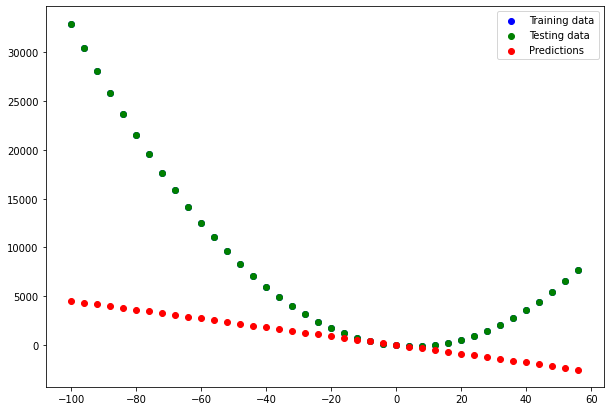

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_train,
                 test_labels=y_train,
                 predictions=y_preds_train)

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_train, y_train)

2/2 [==============================] - 0s 11ms/step - loss: 7469.6821 - mae: 7469.6821 - mean_absolute_percentage_error: 169.1601


[7469.68212890625, 7469.68212890625, 169.16006469726562]

In [ ]:
# Calcuate the MAE manually
mae = tf.metrics.mean_absolute_error(y_true=y_train, 
                                     y_pred=y_preds_train.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=7469.682>

# 4. Build a Deeper Model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation="relu", kernel_initializer='glorot_uniform'),
  tf.keras.layers.Dense(15, activation="relu", kernel_initializer='glorot_uniform'),
  tf.keras.layers.Dense(10, activation="relu", kernel_initializer='glorot_uniform'),
  tf.keras.layers.Dense(5, activation="tanh", kernel_initializer='glorot_uniform'),
  tf.keras.layers.Dense(1, activation="linear", kernel_initializer='glorot_uniform')  
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['mean_squared_error'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 160133968.0000 - mean_squared_error: 160133968.0000
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 160133504.0000 - mean_squared_error: 160133504.0000
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 160132400.0000 - mean_squared_error: 160132400.0000
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 160128480.0000 - mean_squared_error: 160128480.0000
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 160125024.0000 - mean_squared_error: 160125024.0000
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 160123968.0000 - mean_squared_error: 160123968.0000
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 160123200.0000 - mean_squared_error: 160123200.0000
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 160122704.0000 - mean_squared_error: 160122704.0000
Epoch 9/100
2/2

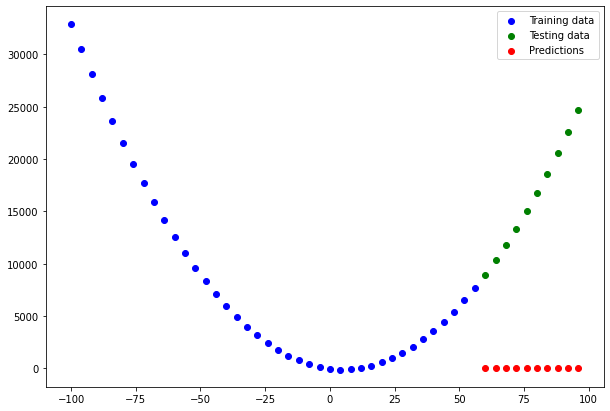

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_2)

# 5. Use wisely the proper activation function

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation=lambda x: x**2, kernel_initializer='glorot_uniform'),
  tf.keras.layers.Dense(10, activation="linear", kernel_initializer='glorot_uniform'),
  tf.keras.layers.Dense(5, activation="linear", kernel_initializer='glorot_uniform'),
  tf.keras.layers.Dense(1, activation="linear", kernel_initializer='glorot_uniform')  
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['mean_squared_error', "mean_absolute_percentage_error"])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=1500, verbose=1)

Epoch 1/1500
2/2 [==============================] - 1s 16ms/step - loss: 150409664.0000 - mean_squared_error: 150409664.0000 - mean_absolute_percentage_error: 95.3069
Epoch 2/1500
2/2 [==============================] - 0s 5ms/step - loss: 149180624.0000 - mean_squared_error: 149180624.0000 - mean_absolute_percentage_error: 94.7068
Epoch 3/1500
2/2 [==============================] - 0s 6ms/step - loss: 147967104.0000 - mean_squared_error: 147967104.0000 - mean_absolute_percentage_error: 94.0881
Epoch 4/1500
2/2 [==============================] - 0s 12ms/step - loss: 146701776.0000 - mean_squared_error: 146701776.0000 - mean_absolute_percentage_error: 93.4651
Epoch 5/1500
2/2 [==============================] - 0s 12ms/step - loss: 145522432.0000 - mean_squared_error: 145522432.0000 - mean_absolute_percentage_error: 92.8853
Epoch 6/1500
2/2 [==============================] - 0s 6ms/step - loss: 144221856.0000 - mean_squared_error: 144221856.0000 - mean_absolute_percentage_error: 92.7020
E

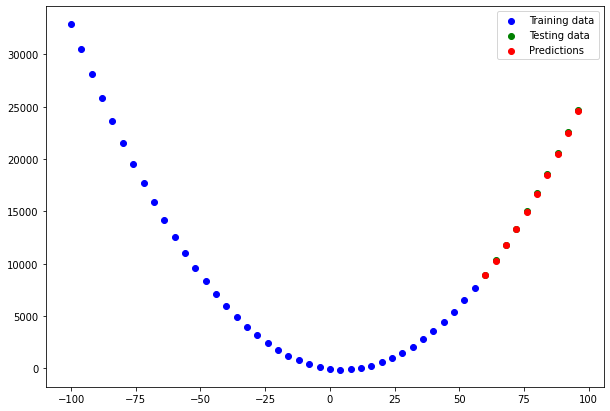

In [ ]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_3)